In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from time import process_time
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgb

from xgboost import XGBClassifier, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
import time

%matplotlib inline

### **Загрузка данных**

In [4]:
x_test = pd.read_csv("/content/bank/X_test.csv")

In [5]:
df = pd.read_csv("/content/bank/X_train.csv")

In [6]:
y_train = pd.read_csv('/content/bank/y_train.csv')

### **y_train**

In [7]:
y_train.head(3)

,index,loan_status
0,0,1
1,1,0
2,2,1


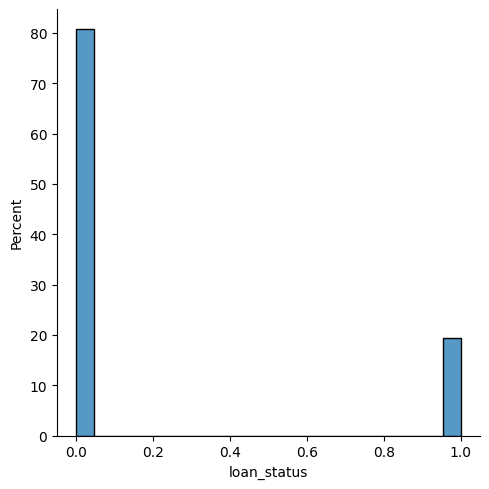

In [8]:
sns.displot(data=y_train, x = 'loan_status', stat='percent')

Несбалансированная выборка.

- 20% - 1 класс

- 80% - 0 класс

### **df**

In [9]:
pd.set_option('display.max_columns', None)
df.head(2)

,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_last_12m,installment,int_rate,issue_d,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
0,0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,685.0,16000.0,RENT,1.0,539.03,12.99%,Apr-2016,16000.0,5.0,50.0,65.0,6.0,3.0,4.0,17.0,14.0,0.0,0.0,0.0,3.0,14.0,2.0,3.0,100.0,1.0,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx
1,1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,685.0,6600.0,MORTGAGE,0.0,214.27,10.42%,Sep-2017,6600.0,2.0,NaN,NaN,NaN,0.0,3.0,8.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,100.0,1.0,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx


In [10]:
pd.set_option('display.max_columns', None)
x_test.head(2)

,index,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_last_12m,installment,int_rate,issue_d,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
0,0,0.0,GA,46209.0,0.0,0.0,0.0,34.98,Apr-2009,8 years,669.0,665.0,15700.0,MORTGAGE,6.0,437.65,22.45%,Jan-2016,15700.0,3.0,48.0,48.0,2.0,1.0,4.0,9.0,11.0,0.0,0.0,0.0,4.0,11.0,3.0,3.0,75.0,0.0,0.0,debt_consolidation,61.7%,0.0,60 months,Debt consolidation,20.0,Verified,302xx
1,1,0.0,PA,43500.0,0.0,0.0,0.0,20.25,Jun-1982,5 years,704.0,700.0,7200.0,OWN,NaN,166.79,13.80%,Apr-2011,7200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,0.0,0.0,debt_consolidation,58.6%,0.0,60 months,POFF,32.0,Not Verified,151xx


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   index                       1199861 non-null  int64  
 1   acc_now_delinq              1199861 non-null  float64
 2   addr_state                  1199861 non-null  object 
 3   annual_inc                  1199861 non-null  float64
 4   chargeoff_within_12_mths    1199824 non-null  float64
 5   collections_12_mths_ex_med  1199824 non-null  float64
 6   delinq_2yrs                 1199861 non-null  float64
 7   dti                         1199861 non-null  float64
 8   earliest_cr_line            1199861 non-null  object 
 9   emp_length                  1128114 non-null  object 
 10  fico_range_high             1199861 non-null  float64
 11  fico_range_low              1199861 non-null  float64
 12  funded_amnt                 1199861 non-null  float64
 1

Сформирую списки числовых и категорильаных признаков

In [12]:
cat_list = list(df.select_dtypes(['object']).columns)
num_list = list(df.select_dtypes(['float64', 'int64']).columns)

In [13]:
pd.set_option('display.max_columns', None)
df.describe()

,index,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,fico_range_high,fico_range_low,funded_amnt,inq_last_12m,installment,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,tax_liens,total_acc
count,1.199861e+06,1.199861e+06,1.199861e+06,1.199824e+06,1.199824e+06,1.199861e+06,1.199861e+06,1.199861e+06,1.199861e+06,1.199861e+06,632646.000000,1.199861e+06,1.199861e+06,1.168320e+06,592418.000000,282665.000000,1.050080e+06,1.154852e+06,1.154852e+06,1.154851e+06,1.162566e+06,1.109253e+06,1.154852e+06,1.154852e+06,1.154852e+06,1.199861e+06,632647.000000,632647.000000,1.155527e+06,1.199861e+06,1.199394e+06,1.199833e+06,1.199861e+06
mean,5.999300e+05,4.625536e-03,7.811051e+04,8.901306e-03,1.810182e-02,3.142264e-01,1.803875e+01,7.012003e+02,6.972001e+02,1.440466e+04,2.180682,4.353205e+02,1.441091e+04,1.598304e+00,34.420117,39.439258,6.827069e+00,5.125202e-01,3.655532e+00,1.432988e+01,1.164593e+01,7.221076e-04,3.144992e-03,8.669682e-02,2.156888e+00,1.162006e+01,1.677463,2.899328,4.318438e+01,2.097351e-01,1.326236e-01,5.066205e-02,2.464238e+01
std,3.463702e+05,7.284156e-02,1.363514e+05,1.081550e-01,1.507312e-01,8.763691e-01,8.404678e+00,3.234104e+01,3.234036e+01,8.855223e+03,2.458328,2.635844e+02,8.858038e+03,1.948998e+00,21.884052,22.645351,5.884748e+00,1.354282e+00,2.285259e+00,8.117148e+00,5.580223e+00,2.877438e-02,5.954449e-02,5.024471e-01,1.853938e+00,5.574730e+00,1.641795,2.667496,3.613864e+01,5.909437e-01,3.732363e-01,3.914037e-01,1.205229e+01
min,0.000000e+00,0.000000e+00,2.300000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,6.640000e+02,6.600000e+02,5.000000e+02,0.000000,4.930000e+00,5.000000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,2.999650e+05,0.000000e+00,4.700000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.174000e+01,6.740000e+02,6.700000e+02,7.675000e+03,0.000000,2.446600e+02,7.700000e+03,0.000000e+00,16.000000,21.000000,2.000000e+00,0.000000e+00,2.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
50%,5.999300e+05,0.000000e+00,6.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.755000e+01,6.940000e+02,6.900000e+02,1.200000e+04,2.000000,3.703700e+02,1.200000e+04,1.000000e+00,31.000000,37.000000,5.000000e+00,0.000000e+00,3.000000e+00,1.300000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.100000e+01,1.000000,2.000000,4.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01
75%,8.998950e+05,0.000000e+00,9.300000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.397000e+01,7.190000e+02,7.150000e+02,2.000000e+04,3.000000,5.767600e+02,2.000000e+04,3.000000e+00,50.000000,58.000000,1.000000e+01,0.000000e+00,5.000000e+00,1.800000e+01,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.400000e+01,2.000000,4.000000,7.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
max,1.199860e+06,6.000000e+00,1.100000e+08,1.000000e+01,2.000000e+01,4.200000e+01,4.996000e+01,8.500000e+02,8.450000e+02,4.000000e+04,49.000000,1.719830e+03,4.000000e+04,6.100000e+01,226.000000,198.000000,2.500000e+01,5.100000e+01,5.000000e+01,1.280000e+02,9.000000e+01,6.000000e+00,4.000000e+00,4.200000e+01,3.200000e+01,9.000000e+01,39.000000,54.000000,1.000000e+02,8.600000e+01,1.200000e+01,8.500000e+01,1.730000e+02


In [14]:
count_nan = df.isnull().sum()

In [15]:
df_nan = pd.DataFrame({'name':count_nan.index, 'Nan':count_nan.values, 'count':df.count(), 'percent': ((1199861 -count_nan.values)/1199861 * 100).round(1)})

In [16]:
df_nan['отчет'] = np.nan

In [17]:
df_nan.loc['acc_now_delinq', 'отчет'] = 'Del - 99%'
df_nan.loc['addr_state', 'отчет'] = 'Ненормальное распределение'
df_nan.loc['annual_inc', 'отчет'] = ''
df_nan.loc['chargeoff_within_12_mths', 'отчет'] = 'Del - 99%'
df_nan.loc['collections_12_mths_ex_med', 'отчет'] = 'Del - 98%'
df_nan.loc['delinq_2yrs', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['dti', 'отчет'] = 'Нормальное распределение'
df_nan.loc['earliest_cr_line', 'отчет'] = 'Нормальное распределение'
df_nan.loc['emp_length', 'отчет'] = 'Ненормальное распределение'
df_nan.loc['fico_range_high', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['fico_range_low', 'отчет'] = 'Del - коррелируется'
df_nan.loc['funded_amnt', 'отчет'] = 'Ненормальное распределение'
df_nan.loc['home_ownership', 'отчет'] = 'get_dummies'
df_nan.loc['inq_last_12m', 'отчет'] = 'Del - 47% Nan'
df_nan.loc['installment', 'отчет'] = 'Нормальное распределение'
df_nan.loc['int_rate', 'отчет'] = 'Много выбросов, ненормальное распределение'
df_nan.loc['issue_d', 'отчет'] = 'Нормальное распределение'
df_nan.loc['loan_amnt', 'отчет'] = 'Del - коррелируется c funded_amnt'
df_nan.loc['mort_acc', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['mths_since_last_delinq', 'отчет'] = 'Del - 51% Nan'
df_nan.loc['mths_since_recent_bc_dlq', 'отчет'] ='Del - 76% Nan'
df_nan.loc['mths_since_recent_inq', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['num_accts_ever_120_pd', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['num_actv_bc_tl', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['num_rev_accts', 'отчет'] = 'Нормальное распределение'
df_nan.loc['num_sats', 'отчет'] = 'Нормальное распределение'
df_nan.loc['num_tl_120dpd_2m', 'отчет'] = 'Del - 99%'
df_nan.loc['num_tl_30dpd', 'отчет'] = 'Del - 99.7%'
df_nan.loc['num_tl_90g_dpd_24m', 'отчет'] = 'Del - 96%'
df_nan.loc['num_tl_op_past_12m', 'отчет'] = 'Нормальное распределение'
df_nan.loc['open_acc', 'отчет'] = 'Нормальное распределение'
df_nan.loc['open_il_24m', 'отчет'] = 'Del - 53% Nan'
df_nan.loc['open_rv_24m', 'отчет'] = 'Del - 53% Nan'
df_nan.loc['percent_bc_gt_75', 'отчет'] = '???'
df_nan.loc['pub_rec', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['pub_rec_bankruptcies', 'отчет'] = 'Логорифмическое распределение'
df_nan.loc['purpose', 'отчет'] = 'get_dummies'
df_nan.loc['revol_util', 'отчет'] = 'Нормальное распределение'
df_nan.loc['tax_liens', 'отчет'] = 'Del 96%'
df_nan.loc['term', 'отчет'] = 'Заменf на 0 и 1'
df_nan.loc['title', 'отчет'] = 'Del - коррелируется с purpose'
df_nan.loc['total_acc', 'отчет'] = 'Нормально распределение'
df_nan.loc['verification_status', 'отчет'] = 'get_dummies'
df_nan.loc['zip_code', 'отчет'] = 'Del - ненормальное распределение'

In [18]:
df_nan['NAN'] = np.nan

In [19]:
df_nan.loc['emp_length', 'NAN'] = 'NAN на 0'
df_nan.loc['mort_acc', 'NAN'] = 'NAN на 0'
df_nan.loc['mths_since_recent_inq', 'NAN'] = 'NAN на 0'
df_nan.loc['num_accts_ever_120_pd', 'NAN'] = 'NAN на 0'
df_nan.loc['num_actv_bc_tl', 'NAN'] = 'NAN на 0'
df_nan.loc['num_rev_accts', 'NAN'] = 'NAN на 0'
df_nan.loc['num_sats', 'NAN'] = 'NAN на 0'
df_nan.loc['num_tl_op_past_12m', 'NAN'] = 'NAN на 0'
df_nan.loc['percent_bc_gt_75', 'NAN'] = 'NAN на 0'
df_nan.loc['pub_rec_bankruptcies', 'NAN'] = 'NAN на 0'
df_nan.loc['revol_util', 'NAN'] = 'NAN на 0'

In [20]:
df_nan

,name,Nan,count,percent,отчет,NAN
index,index,0,1199861,100.0,NaN,NaN
acc_now_delinq,acc_now_delinq,0,1199861,100.0,Del - 99%,NaN
addr_state,addr_state,0,1199861,100.0,Ненормальное распределение,NaN
annual_inc,annual_inc,0,1199861,100.0,,NaN
chargeoff_within_12_mths,chargeoff_within_12_mths,37,1199824,100.0,Del - 99%,NaN
collections_12_mths_ex_med,collections_12_mths_ex_med,37,1199824,100.0,Del - 98%,NaN
delinq_2yrs,delinq_2yrs,0,1199861,100.0,Логорифмическое распределение,NaN
dti,dti,0,1199861,100.0,Нормальное распределение,NaN
earliest_cr_line,earliest_cr_line,0,1199861,100.0,Нормальное распределение,NaN
emp_length,emp_length,71747,1128114,94.0,Ненормальное распределение,NAN на 0


Удаляю те столбцы кол-во уникальных значений в которых превышает 90%

In [21]:
list_90 = []
for column in df[num_list]:
  per = df[column].value_counts(normalize=True)[df[column].value_counts().index.tolist()[0]] *100
  if per > 90:
    list_90.append(column)

In [22]:
df.drop(list_90,axis= 1 , inplace= True)
x_test.drop(list_90,axis= 1 , inplace= True)

Диаграмма степени заполнения признака данными.

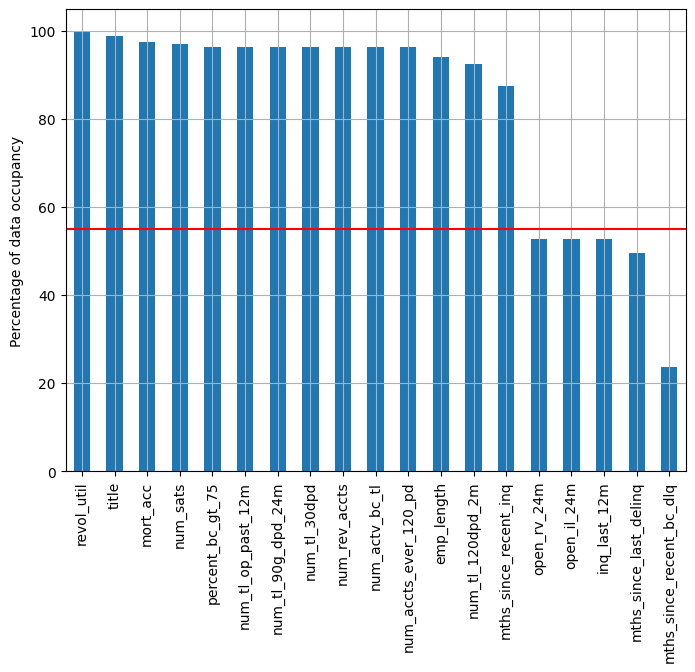

In [23]:
percent = ((1199861 -count_nan)/1199861 * 100).round(1)
plt.figure(figsize= (8,6))
plt.ylabel('Percentage of data occupancy')
percent.sort_values(ascending= False, inplace=True)
# colors = ['red' if i < 50 else 'blue' for i in percent.values]
percent[percent !=100].plot(kind = 'bar', grid = True)
plt.axhline(y=55, color='r', linestyle='-')
plt.show()

Удаляю те признаки кол-во NaN в которых превышает 55%

In [24]:
del_NAN = ['inq_last_12m', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 'open_rv_24m', 'open_il_24m']

In [25]:
df.drop(del_NAN, axis= 1 , inplace= True )
x_test.drop(del_NAN, axis= 1 , inplace= True )

In [26]:
new_num_list = list(set(num_list) - set(list_90) - set(del_NAN))

## **Числовые данные**

### Гистограммы

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


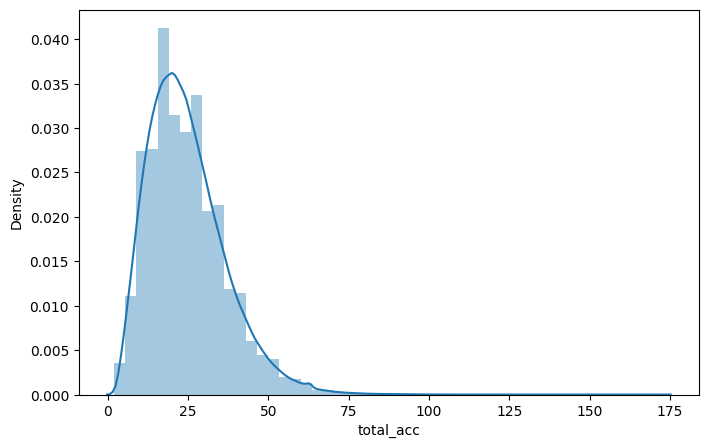

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


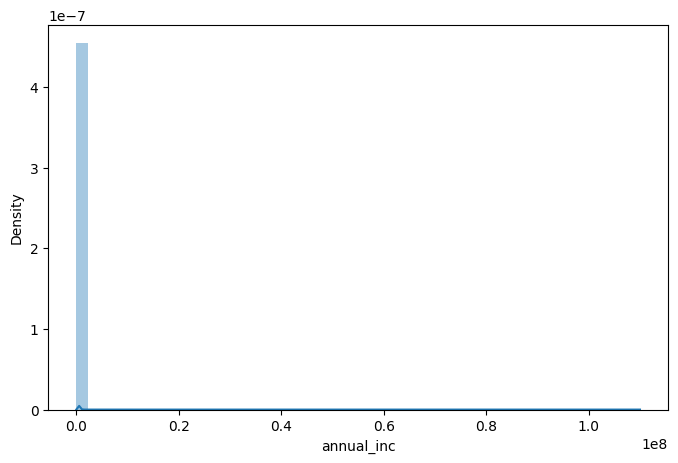

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


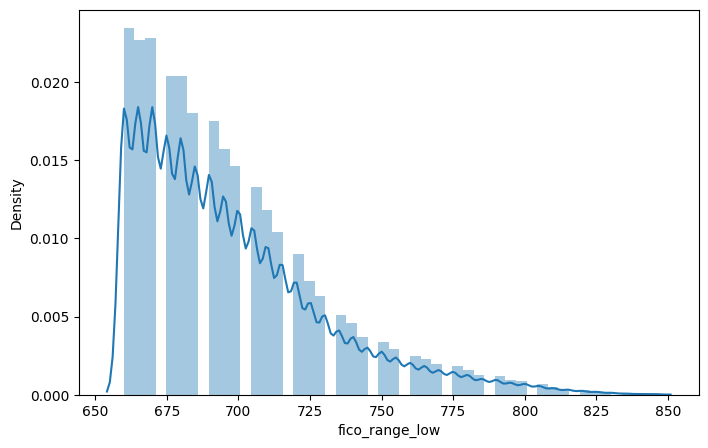

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


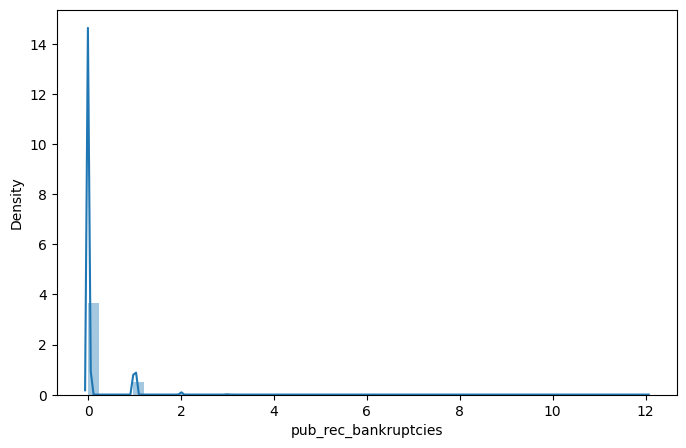

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


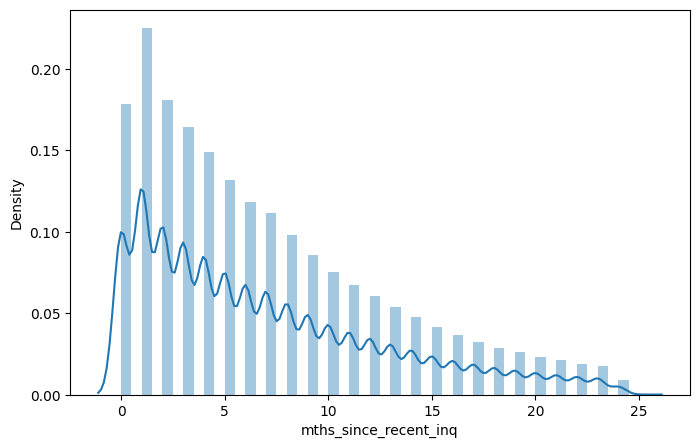

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


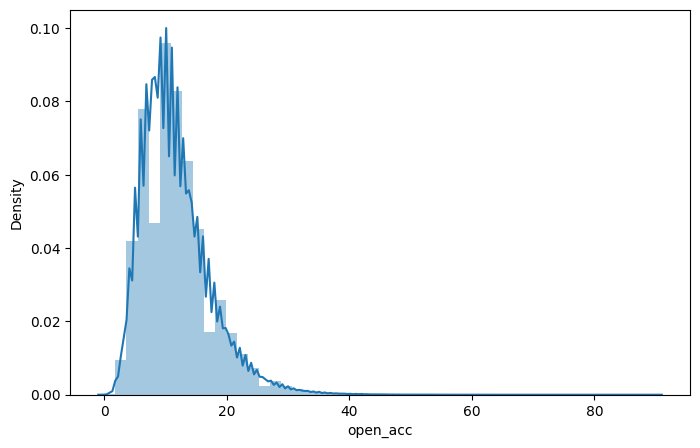

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


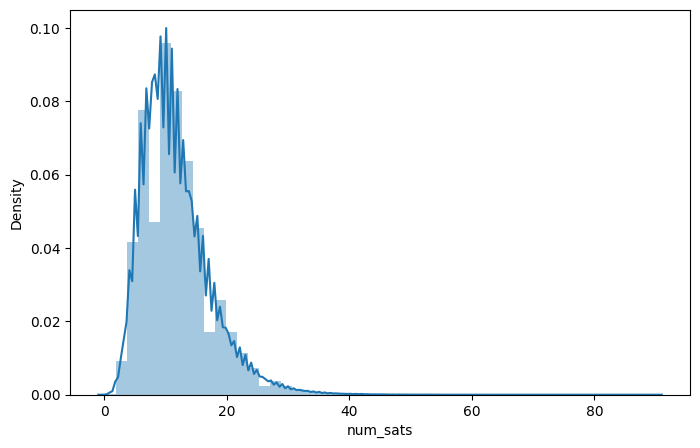

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


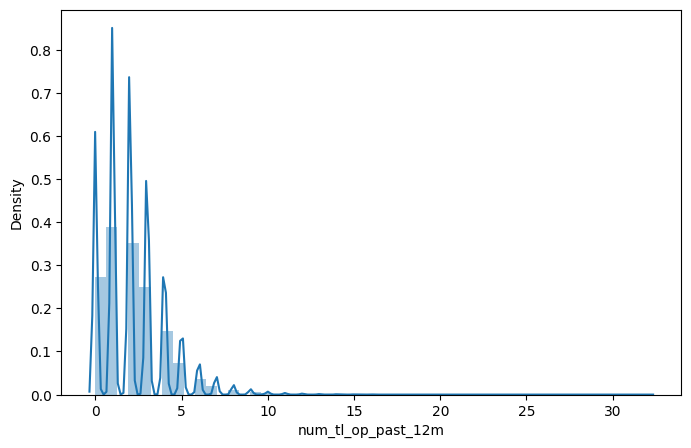

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


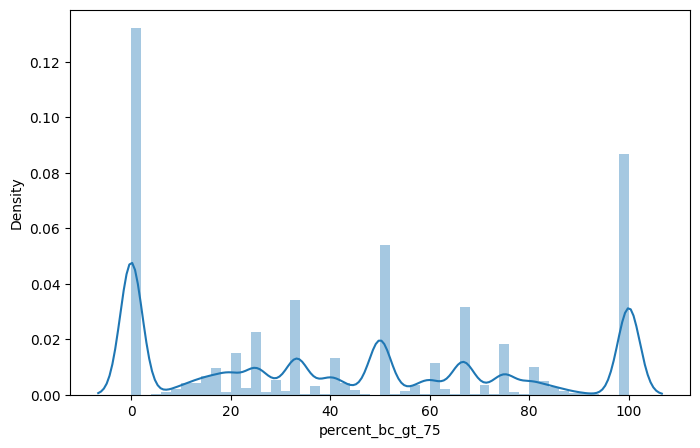

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


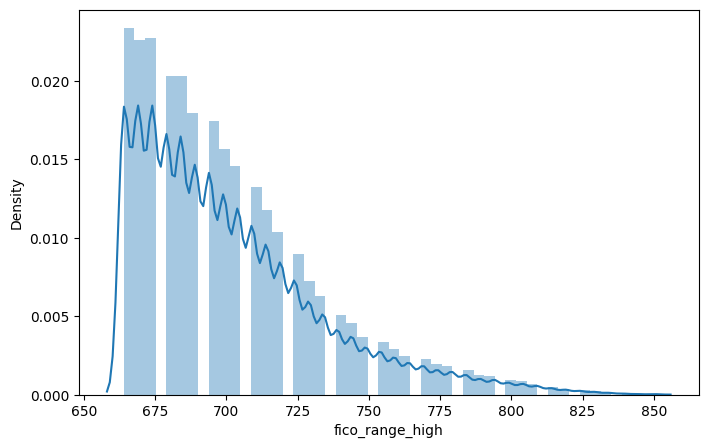

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


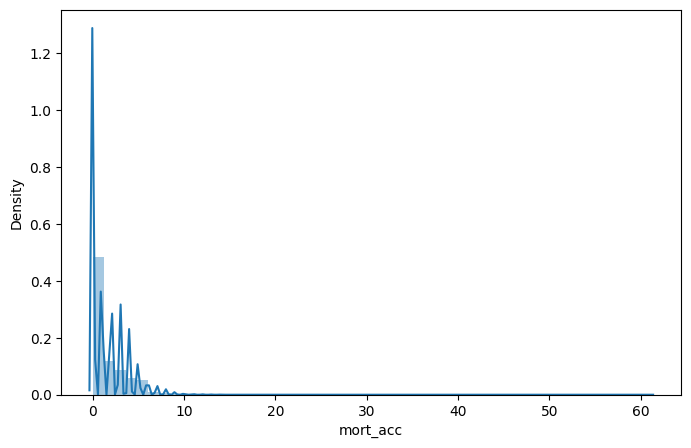

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


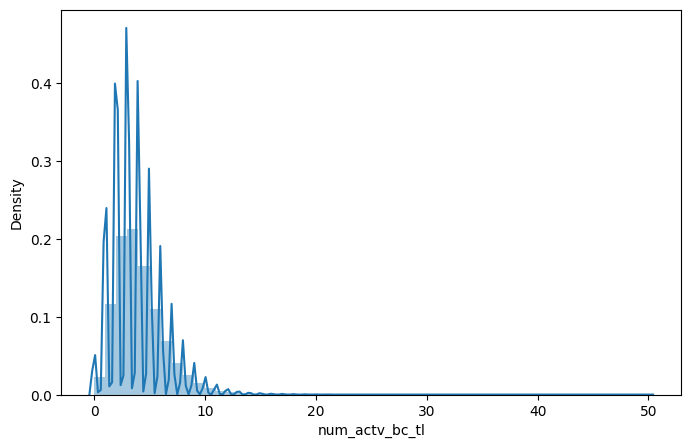

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


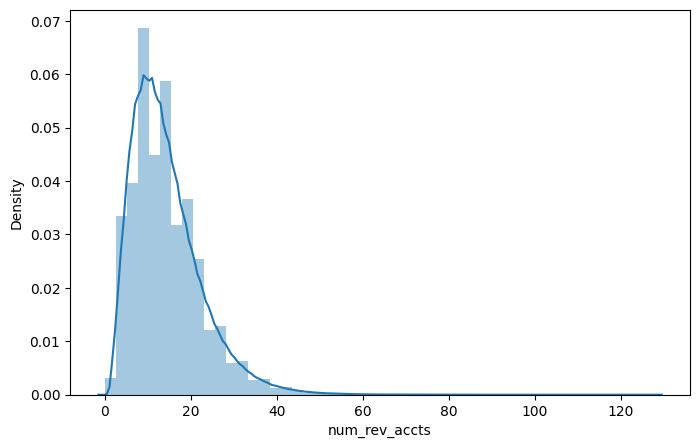

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


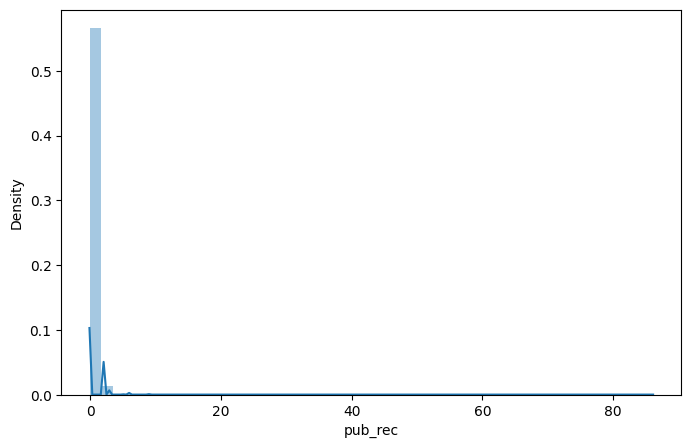

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


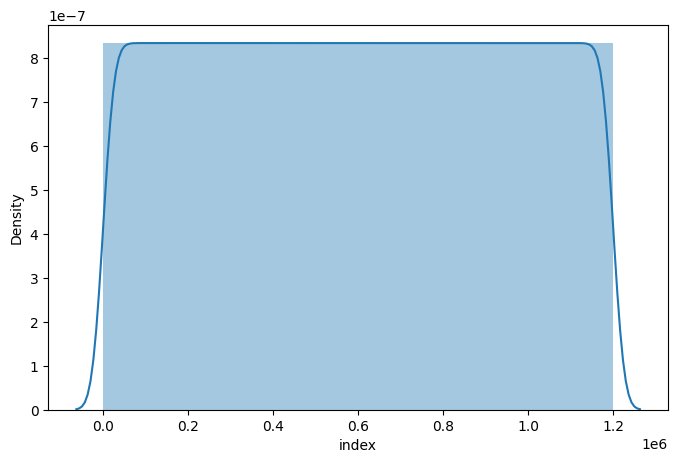

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


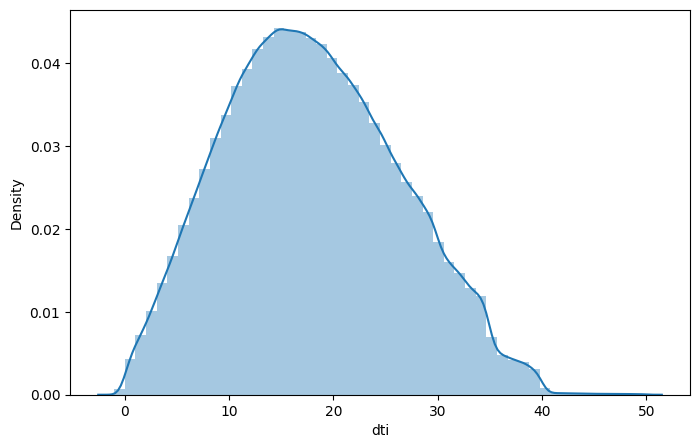

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


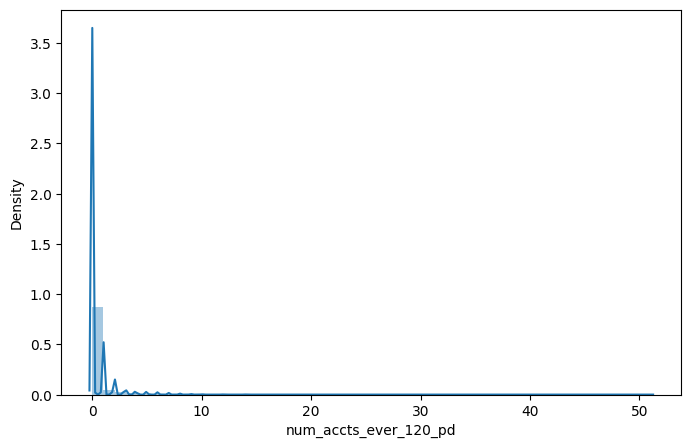

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


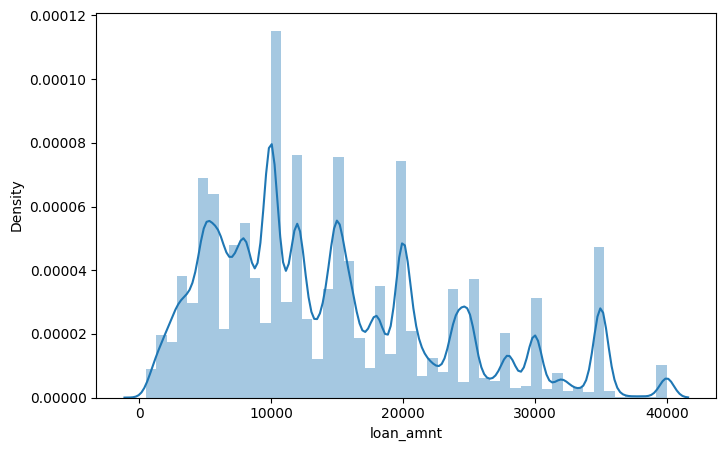

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


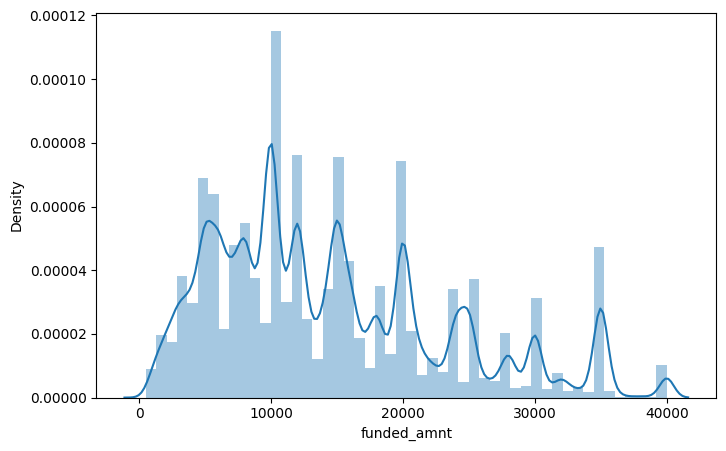

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


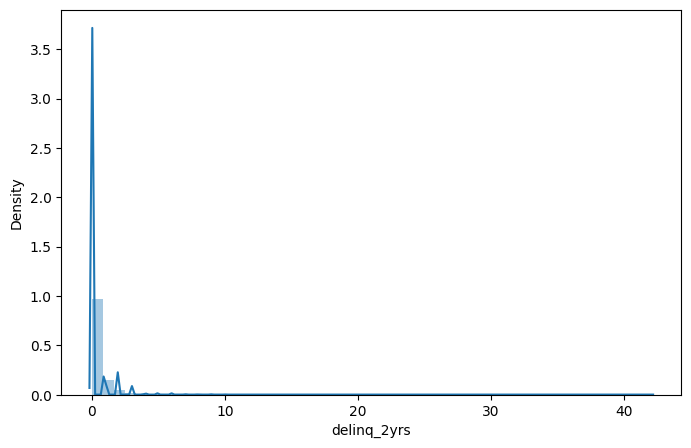

<ipython-input-27-dc16a8357233>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


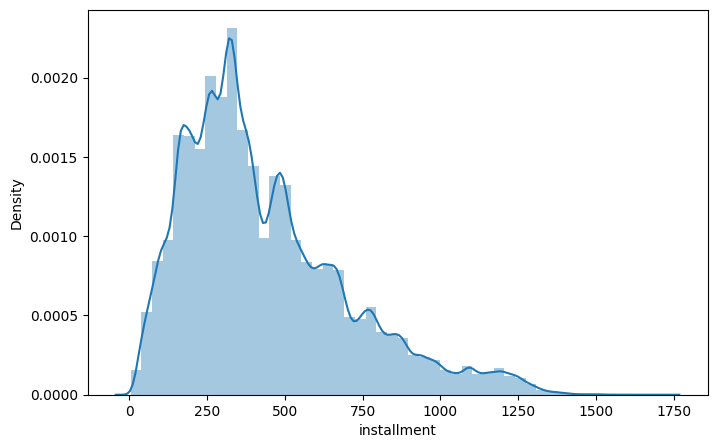

In [27]:
for col in new_num_list:
  fig = plt.figure(figsize=(8,5))
  sns.distplot(df[col])
  plt.show()

In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-28-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,index,annual_inc,delinq_2yrs,dti,fico_range_high,fico_range_low,funded_amnt,installment,loan_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,total_acc
index,1.000000,0.000753,0.002134,-0.000775,-0.001722,-0.001723,0.000218,0.000559,0.000182,-0.000256,-0.001113,0.000311,0.000692,0.000029,0.001042,-0.000043,0.001166,0.000655,0.000249,-0.000603,0.000078
annual_inc,0.000753,1.000000,0.020794,-0.089276,0.036357,0.036358,0.169481,0.164026,0.169509,0.111504,-0.021420,0.006677,0.057867,0.053678,0.071202,0.027134,0.072762,-0.006069,-0.003612,-0.023770,0.092520
delinq_2yrs,0.002134,0.020794,1.000000,-0.012259,-0.176767,-0.176769,-0.003309,0.006176,-0.003443,0.073246,-0.027081,0.215287,-0.039602,0.077630,0.046420,-0.025911,0.050699,-0.004675,-0.021959,-0.049365,0.117736
dti,-0.000775,-0.089276,-0.012259,1.000000,-0.072275,-0.072272,0.021245,0.027731,0.020898,-0.032955,0.004478,-0.043988,0.182461,0.147154,0.295008,0.083563,0.299783,0.168933,-0.040490,-0.024900,0.238391
fico_range_high,-0.001722,0.036357,-0.176767,-0.072275,1.000000,1.000000,0.095587,0.046716,0.096181,0.093802,0.071312,-0.197339,-0.110418,0.024310,0.034872,-0.084047,0.022428,-0.418789,-0.190066,-0.197647,0.025295
fico_range_low,-0.001723,0.036358,-0.176769,-0.072272,1.000000,1.000000,0.095588,0.046716,0.096181,0.093800,0.071311,-0.197341,-0.110418,0.024311,0.034874,-0.084044,0.022429,-0.418793,-0.190069,-0.197649,0.025296
funded_amnt,0.000218,0.169481,-0.003309,0.021245,0.095587,0.095588,1.000000,0.952603,0.999688,0.224638,-0.001688,-0.050380,0.200268,0.175091,0.183969,-0.019437,0.186427,0.024636,-0.059670,-0.087055,0.209557
installment,0.000559,0.164026,0.006176,0.027731,0.046716,0.046716,0.952603,1.000000,0.952145,0.190428,-0.014607,-0.041323,0.203004,0.162850,0.173197,-0.000400,0.176209,0.043756,-0.048702,-0.079551,0.186162
loan_amnt,0.000182,0.169509,-0.003443,0.020898,0.096181,0.096181,0.999688,0.952145,1.000000,0.224634,-0.001689,-0.050378,0.200268,0.175092,0.183968,-0.019434,0.186188,0.024641,-0.059841,-0.087193,0.209586
mort_acc,-0.000256,0.111504,0.073246,-0.032955,0.093802,0.093800,0.224638,0.190428,0.224634,1.000000,-0.060393,0.061482,0.039022,0.222028,0.125248,0.060162,0.127815,0.011100,-0.008086,-0.000697,0.367398


fico_range_low коррелируется с fico_range_high. Разница между значениями 3 еденицы.

In [29]:
df.drop(['fico_range_high'], axis= 1 , inplace= True)
x_test.drop(['fico_range_high'] , axis= 1 , inplace= True)

Loan_amnt и installment - удаленнно коррелируется c funded_amnt

In [30]:
df.drop('loan_amnt', axis= 1 , inplace= True )
x_test.drop('loan_amnt', axis= 1 , inplace= True )

In [31]:
df.drop('installment', axis= 1 , inplace= True)
x_test.drop('installment', axis= 1 , inplace= True )

Удаляю 'num_sats' так как он коррелируется с 'open_acc'. В 'num_sats' меньше данных.

In [32]:
df.drop('num_sats', axis= 1 , inplace= True )

In [33]:
x_test.drop('num_sats', axis= 1 , inplace= True )

'delinq_2yrs', 'mort_acc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','pub_rec','pub_rec_bankruptcies' - данные признаки скошены вправо по оси и имеют правый хвост, поэтому представлю данные признаки к логнормальному распределению.

In [34]:
log_lst = ['delinq_2yrs', 'mort_acc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','pub_rec','pub_rec_bankruptcies']

In [35]:
def log_dist(df, lst):
    df[lst] = np.log(df[lst] + 1)
    return df

In [36]:
df = log_dist(df, log_lst)
x_test = log_dist(x_test, log_lst)

addr_state ключает в себя 51 уникальное значение. Поэтому вместо 'one_hot_encoding' использую целевое кодирование. Основой будет являться годовой доход 'annual_inc'

In [37]:
df['addr_state'] = df.groupby('addr_state')['annual_inc'].transform('mean') / 1000
x_test['addr_state'] = x_test.groupby('addr_state')['annual_inc'].transform('mean') / 1000

revol_util - norm dist

In [38]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0
x_test['revol_util'] = x_test['revol_util'].str.rstrip('%').astype('float') / 100.0

## **Категориальные данные**

Перевожу дату в года и меняю формат, чтобы модель смогла работать с признаком


In [39]:
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year
x_test['earliest_cr_line'] = pd.DatetimeIndex(x_test['earliest_cr_line']).year

In [40]:
df['issue_d'] = pd.DatetimeIndex(df['issue_d']).year
x_test['issue_d'] = pd.DatetimeIndex(x_test['issue_d']).year

emp_length - перевожу признак из строкового формата в числовой

In [41]:
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length']=df['emp_length'].astype(float)

In [42]:
x_test['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
x_test['emp_length']=x_test['emp_length'].astype(float)

home_ownership


get_dummies()

In [43]:
df['home_ownership'].nunique()

6

In [44]:
df = pd.get_dummies (df, columns=['home_ownership'], drop_first= True )
x_test = pd.get_dummies (x_test, columns=['home_ownership'], drop_first= True )

purpose

get_dummies()

In [45]:
df['purpose'].nunique()

14

In [46]:
df = pd.get_dummies (df, columns=['purpose'], drop_first= True )
x_test = pd.get_dummies (x_test, columns=['purpose'], drop_first= True )

verification_status

 get_dummies()

In [47]:
df['verification_status'].nunique()

3

In [48]:
df = pd.get_dummies (df, columns=['verification_status'], drop_first= True )
x_test = pd.get_dummies (x_test, columns=['verification_status'], drop_first= True )

int_rate  -  удаляю символ процента

In [49]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')
x_test['int_rate'] = x_test['int_rate'].str.rstrip('%').astype('float')

term  - Значения признака 36 и 60 меняю на 0 и 1

In [50]:
df['term'] = df['term'].str.rstrip('months').astype('float')
x_test['term'] = x_test['term'].str.rstrip('months').astype('float')

df.loc[df["term"] == 36, "term"] = 0
x_test.loc[x_test["term"] == 36, "term"] = 0

df.loc[df["term"] == 60, "term"] = 1
x_test.loc[x_test["term"] == 60, "term"] = 1

title -  Слишком много уникальных значений категориального признака

In [51]:
df['title'].nunique()

43858

In [52]:
df.drop('title', axis = 1, inplace = True )
x_test.drop('title', axis = 1, inplace = True )

zip_code

In [53]:
df['zip_code'] = df['zip_code'].str.rstrip('xxx').astype('float')
x_test['zip_code'] = x_test['zip_code'].str.rstrip('xxx').astype('float')

In [54]:
df.drop('index', axis = 1, inplace = True )
x_test.drop('index', axis = 1, inplace = True )

In [55]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,funded_amnt,int_rate,issue_d,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_util,term,total_acc,zip_code,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
addr_state,1.000000,0.044337,0.017667,-0.085864,0.002044,-0.014700,0.005993,0.055075,-0.008554,-0.028852,-0.085868,0.020627,0.014633,0.056384,0.035477,-0.007678,0.013493,-0.014261,-0.041026,-0.035009,0.000798,-0.011311,-0.024802,-0.014124,-0.116017,0.002308,0.001722,-0.031817,0.138694,-0.007099,-0.001590,0.000282,-0.009839,-0.002496,0.000268,-0.002520,0.012856,0.016468,0.003613,0.006128,0.008571,0.011436,0.006676,0.005532
annual_inc,0.044337,1.000000,0.024506,-0.089276,-0.066960,0.035168,0.036358,0.169481,-0.039528,0.028026,0.113319,-0.020157,0.007262,0.052828,0.053678,0.027134,0.072762,-0.006069,-0.009216,-0.024578,0.020502,0.028500,0.092520,-0.001073,0.076015,-0.000487,-0.000861,-0.013330,-0.068988,-0.001952,-0.008862,-0.002520,0.029726,0.004416,0.001527,-0.003506,-0.004500,-0.009070,-0.001066,0.012262,-0.004085,-0.002192,0.024768,0.003442
delinq_2yrs,0.017667,0.024506,1.000000,-0.013101,-0.096545,0.028855,-0.205676,0.001232,0.057573,0.002957,0.101940,-0.031400,0.214949,-0.044779,0.084412,-0.031239,0.052674,-0.002264,-0.035346,-0.062136,-0.002933,-0.007893,0.120870,-0.033209,0.055453,0.000829,-0.000498,0.002050,-0.057694,-0.032797,0.012395,-0.002553,0.019808,0.003585,-0.001174,0.005832,0.003111,0.006281,-0.000366,0.004225,-0.000189,-0.003580,0.022209,0.004059
dti,-0.085864,-0.089276,-0.013101,1.000000,-0.049260,0.046258,-0.072272,0.021245,0.183969,0.031057,-0.026327,0.016824,-0.052987,0.175741,0.147154,0.083563,0.299783,0.168933,-0.041665,-0.024677,0.183627,0.065940,0.238391,0.002275,0.002889,0.000491,-0.003004,0.020659,-0.016266,0.016224,0.086053,-0.010276,-0.066065,-0.033032,-0.057784,-0.008400,-0.017200,-0.039981,-0.005738,-0.044109,-0.004921,-0.017305,-0.064040,0.113685
earliest_cr_line,0.002044,-0.066960,-0.096545,-0.049260,1.000000,-0.218499,-0.083251,-0.153170,0.107405,0.211854,-0.314019,0.000148,-0.100697,-0.116095,-0.316100,0.019022,-0.133581,-0.060965,-0.064790,-0.046712,-0.064480,-0.047312,-0.279192,0.007999,-0.169759,-0.002015,-0.004168,-0.044806,0.201466,-0.005151,-0.012090,-0.002609,-0.034017,0.015133,0.024652,-0.003706,0.024505,0.029155,0.002855,0.003670,0.014346,0.001006,0.060656,-0.065257
emp_length,-0.014700,0.035168,0.028855,0.046258,-0.218499,1.000000,0.022651,0.090665,-0.008703,-0.003645,0.219447,0.005940,0.020448,0.066505,0.148243,0.023458,0.049178,0.029797,0.038012,0.027824,0.038263,0.057929,0.109378,-0.015059,0.186990,0.001562,-0.003023,0.023001,-0.204594,-0.027172,0.022750,-0.008845,0.043858,-0.009135,-0.019557,-0.000600,-0.033702,-0.005027,0.001330,-0.015108,0.007993,-0.015255,-0.041331,0.047309
fico_range_low,0.005993,0.036358,-0.205676,-0.072272,-0.083251,0.022651,1.000000,0.095588,-0.408493,0.052788,0.099838,0.055646,-0.245224,-0.123470,0.024311,-0.084044,0.022429,-0.418793,-0.224363,-0.203121,-0.471830,-0.003947,0.025296,-0.007987,0.091616,-0.000329,0.002284,0.020035,-0.106681,-0.016417,-0.066367,0.005946,0.068062,0.023125,0.054365,0.009532,0.002071,0.021331,0.001336,0.021408,0.006856,0.009852,-0.082641,-0.084741
funded_amnt,0.055075,0.169481,0.001232,0.021245,-0.153170,0.090665,0.095588,1.000000,0.118581,0.011896,0.236416,-0.002515,-0.057120,0.197982,0.175091,-0.019437,0.186427,0.024636,-0.075289,-0.089755,0.107814,0.381809,0.209557,0.004141,0.171970,-0.000096,-0.003172,-0.022927,-0

Удаляю коррелируемые признаки

In [56]:
drop_lst = ['pub_rec', 'open_acc', 'num_rev_accts', 'percent_bc_gt_75']

In [57]:
def drop_feat(df, lst):
    df.drop(lst, axis = 1, inplace = True)
    return df

In [58]:
df = drop_feat(df,drop_lst)
x_test = drop_feat(x_test,drop_lst)

In [59]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,addr_state,annual_inc,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_low,funded_amnt,int_rate,issue_d,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_tl_op_past_12m,pub_rec_bankruptcies,revol_util,term,total_acc,zip_code,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
addr_state,1.000000,0.044337,0.017667,-0.085864,0.002044,-0.014700,0.005993,0.055075,-0.008554,-0.028852,-0.085868,0.020627,0.014633,0.056384,-0.007678,-0.035009,0.000798,-0.011311,-0.024802,-0.014124,-0.116017,0.002308,0.001722,-0.031817,0.138694,-0.007099,-0.001590,0.000282,-0.009839,-0.002496,0.000268,-0.002520,0.012856,0.016468,0.003613,0.006128,0.008571,0.011436,0.006676,0.005532
annual_inc,0.044337,1.000000,0.024506,-0.089276,-0.066960,0.035168,0.036358,0.169481,-0.039528,0.028026,0.113319,-0.020157,0.007262,0.052828,0.027134,-0.024578,0.020502,0.028500,0.092520,-0.001073,0.076015,-0.000487,-0.000861,-0.013330,-0.068988,-0.001952,-0.008862,-0.002520,0.029726,0.004416,0.001527,-0.003506,-0.004500,-0.009070,-0.001066,0.012262,-0.004085,-0.002192,0.024768,0.003442
delinq_2yrs,0.017667,0.024506,1.000000,-0.013101,-0.096545,0.028855,-0.205676,0.001232,0.057573,0.002957,0.101940,-0.031400,0.214949,-0.044779,-0.031239,-0.062136,-0.002933,-0.007893,0.120870,-0.033209,0.055453,0.000829,-0.000498,0.002050,-0.057694,-0.032797,0.012395,-0.002553,0.019808,0.003585,-0.001174,0.005832,0.003111,0.006281,-0.000366,0.004225,-0.000189,-0.003580,0.022209,0.004059
dti,-0.085864,-0.089276,-0.013101,1.000000,-0.049260,0.046258,-0.072272,0.021245,0.183969,0.031057,-0.026327,0.016824,-0.052987,0.175741,0.083563,-0.024677,0.183627,0.065940,0.238391,0.002275,0.002889,0.000491,-0.003004,0.020659,-0.016266,0.016224,0.086053,-0.010276,-0.066065,-0.033032,-0.057784,-0.008400,-0.017200,-0.039981,-0.005738,-0.044109,-0.004921,-0.017305,-0.064040,0.113685
earliest_cr_line,0.002044,-0.066960,-0.096545,-0.049260,1.000000,-0.218499,-0.083251,-0.153170,0.107405,0.211854,-0.314019,0.000148,-0.100697,-0.116095,0.019022,-0.046712,-0.064480,-0.047312,-0.279192,0.007999,-0.169759,-0.002015,-0.004168,-0.044806,0.201466,-0.005151,-0.012090,-0.002609,-0.034017,0.015133,0.024652,-0.003706,0.024505,0.029155,0.002855,0.003670,0.014346,0.001006,0.060656,-0.065257
emp_length,-0.014700,0.035168,0.028855,0.046258,-0.218499,1.000000,0.022651,0.090665,-0.008703,-0.003645,0.219447,0.005940,0.020448,0.066505,0.023458,0.027824,0.038263,0.057929,0.109378,-0.015059,0.186990,0.001562,-0.003023,0.023001,-0.204594,-0.027172,0.022750,-0.008845,0.043858,-0.009135,-0.019557,-0.000600,-0.033702,-0.005027,0.001330,-0.015108,0.007993,-0.015255,-0.041331,0.047309
fico_range_low,0.005993,0.036358,-0.205676,-0.072272,-0.083251,0.022651,1.000000,0.095588,-0.408493,0.052788,0.099838,0.055646,-0.245224,-0.123470,-0.084044,-0.203121,-0.471830,-0.003947,0.025296,-0.007987,0.091616,-0.000329,0.002284,0.020035,-0.106681,-0.016417,-0.066367,0.005946,0.068062,0.023125,0.054365,0.009532,0.002071,0.021331,0.001336,0.021408,0.006856,0.009852,-0.082641,-0.084741
funded_amnt,0.055075,0.169481,0.001232,0.021245,-0.153170,0.090665,0.095588,1.000000,0.118581,0.011896,0.236416,-0.002515,-0.057120,0.197982,-0.019437,-0.089755,0.107814,0.381809,0.209557,0.004141,0.171970,-0.000096,-0.003172,-0.022927,-0.160477,0.019923,0.113996,-0.011759,-0.010727,0.007366,-0.040202,-0.068467,-0.061786,-0.129891,-0.013289,0.015198,-0.079880,-0.015316,0.030072,0.163263
int_rate,-0.008554,-0.039528,0.057573,0.183969,0.107405,-0.008703,-0.408493,0.118581,1.000000,-0.027174,-0.097380,-0.160663,0.060935,0.019702,0.192954,0.057867,0.251089,0.391682,-0.042378,-0.005625,

### NAN

In [60]:
X = df.values
mice = IterativeImputer(max_iter=100, random_state=0)
MICE = mice.fit_transform(X)

In [61]:
df = pd.DataFrame(MICE,columns=df.columns.to_list())

In [62]:
x_t = x_test.values
mice = IterativeImputer(max_iter=100, random_state=0)
MICE_test = mice.fit_transform(x_t)

In [63]:
x_test = pd.DataFrame(MICE_test,columns=df.columns.to_list())

### Preprocessing

In [64]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df)
scaled_df = scaler.transform(df)

In [65]:
scaled_x_test = scaler.transform(x_test)

In [66]:
y_train.drop('index', axis= 1 , inplace= True)

In [67]:
y_list = y_train['loan_status'].tolist()

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(scaled_df, y_train)

In [69]:
X_train_resampled.shape

(1936506, 40)

In [70]:
y_train_resampled.shape

(1936506, 1)

### Model

In [71]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_resampled, y_train_resampled,test_size = 0.25, random_state=1)

In [72]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()

In [73]:
models = [LR, DT, RF, GB, XGB]

In [74]:
def model_fun(models, x_train, y_train, x_test, y_test):
      df_mod = pd.DataFrame()
      for i, model in enumerate(models):
          t1 = time.perf_counter()
          model.fit(x_train, y_train)
          t2 = time.perf_counter()
          print(model.__class__.__name__, ':   time taken to run:', (t2-t1)/60)
          pred = model.predict(x_test)
          accuracy = accuracy_score(y_test, pred)
          df_mod.loc[i, 'model'] = model.__class__.__name__
          df_mod.loc[i, 'accuracy'] = accuracy
      return df_mod

In [75]:
df_model = model_fun(models, X_train1, y_train1, X_test1, y_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression :   time taken to run: 0.1524957182166645
DecisionTreeClassifier :   time taken to run: 0.8703298040833336


<ipython-input-74-9268f49c383f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier :   time taken to run: 12.130011749383334


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier :   time taken to run: 20.102322609766663
XGBClassifier :   time taken to run: 9.291287527550002


In [76]:
df_model

,model,accuracy
0,LogisticRegression,0.652069
1,DecisionTreeClassifier,0.807398
2,RandomForestClassifier,0.886286
3,GradientBoostingClassifier,0.853629
4,XGBClassifier,0.882231


Наилучший результат показала модель 'XGBClassifier'. В дальнейшем данная модель будет использоваться в вычисление оптимальных параметров.

### **XG Boost Classifier GridSearch**

In [77]:
from sklearn.model_selection import RandomizedSearchCV
XGB = XGBClassifier(objective = 'binary:logistic',
    nthread=4)

parameters = {
    'scale_pos_weight':[10,50,100],
    'eta': [0.3, 0.4, 0.5],
    'max_depth': [5, 7, 9],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

grid = RandomizedSearchCV(XGB, parameters, cv=2, scoring='accuracy', verbose=10)

In [ ]:
XgbEval=grid.fit(X_train1, y_train1)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START colsample_bytree=1.0, eta=0.5, max_depth=7, scale_pos_weight=10, subsample=0.9
[CV 1/2; 1/10] END colsample_bytree=1.0, eta=0.5, max_depth=7, scale_pos_weight=10, subsample=0.9;, score=0.659 total time= 5.1min
[CV 2/2; 1/10] START colsample_bytree=1.0, eta=0.5, max_depth=7, scale_pos_weight=10, subsample=0.9
[CV 2/2; 1/10] END colsample_bytree=1.0, eta=0.5, max_depth=7, scale_pos_weight=10, subsample=0.9;, score=0.660 total time= 5.1min
[CV 1/2; 2/10] START colsample_bytree=1.0, eta=0.5, max_depth=9, scale_pos_weight=100, subsample=0.9
[CV 1/2; 2/10] END colsample_bytree=1.0, eta=0.5, max_depth=9, scale_pos_weight=100, subsample=0.9;, score=0.583 total time= 7.0min
[CV 2/2; 2/10] START colsample_bytree=1.0, eta=0.5, max_depth=9, scale_pos_weight=100, subsample=0.9
[CV 2/2; 2/10] END colsample_bytree=1.0, eta=0.5, max_depth=9, scale_pos_weight=100, subsample=0.9;, score=0.580 total time= 6.8min
[CV 1/2; 3/

In [ ]:
best_params = XgbEval.best_estimator_
best_params

In [ ]:
y_pred = best_params.predict_proba(scaled_x_test)

### Выгрузка результата

In [ ]:
a = pd.DataFrame(y_pred)

In [ ]:
a.drop(0, axis = 1, inplace = True )

In [ ]:
a.columns = ['loan_status']

In [ ]:
count_nan = a.isnull().sum()
count_nan

In [ ]:
excel_file = pd.ExcelWriter('a.xlsx')
a.to_excel(excel_file)
excel_file.save()